Exploratory Data Analysis (EDA) On Salary Data

In [2]:
#importing all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Shekhani Laptops\AppData\Local\Temp\ipykernel_5332\4289622996.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#Loading Dataset
df = pd.read_csv("Salary_Data (1).csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
# Displaying the first five rows
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
# Displaying the last five rows
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [6]:
#Displaying all the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [7]:
#Displaying descriptive information
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
#Displaying no of rows and columns
df.shape

(30, 2)

In [9]:
#Displaying column names
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [10]:
#Checking memory usage of every column
df.memory_usage()

Index              132
YearsExperience    240
Salary             240
dtype: int64

In [11]:
#Checking missing values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [12]:
# Checking data types of the columns
print("\nData types of the columns:")
print(df.dtypes)


Data types of the columns:
YearsExperience    float64
Salary             float64
dtype: object


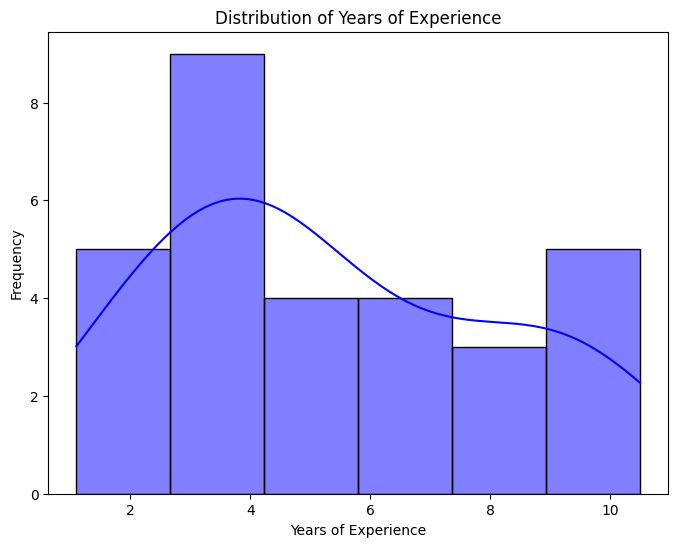

In [13]:
# Distribution of Years Experience
plt.figure(figsize=(8, 6))
sns.histplot(df['YearsExperience'], kde=True, color='blue')
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()


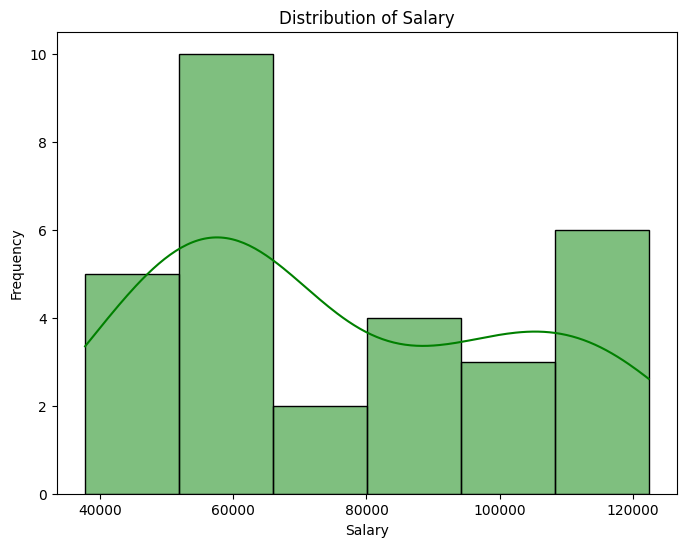

In [14]:
# Distribution of Salary
plt.figure(figsize=(8, 6))
sns.histplot(df['Salary'], kde=True, color='green')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

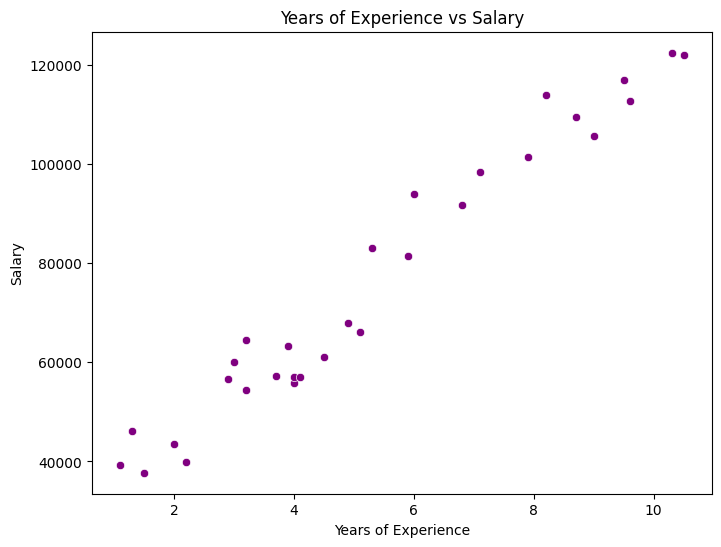

In [15]:
# Scatter plot to visualize the relationship between YearsExperience and Salary
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='purple')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [16]:
#Correlation Matrix
print("\nCorrelation matrix:")
df.corr()


Correlation matrix:


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


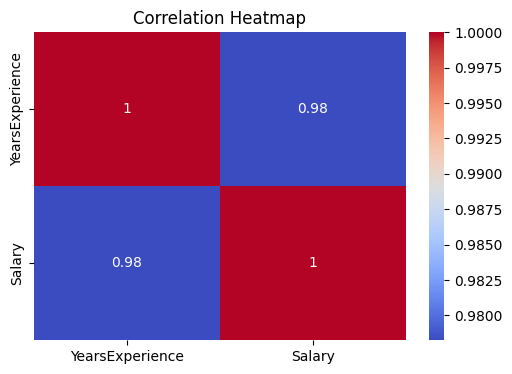

In [17]:
# Heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Shekhani Laptops\AppData\Local\Temp\ipykernel_5332\1160575508.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('ExperienceGroup')['Salary'].sum()


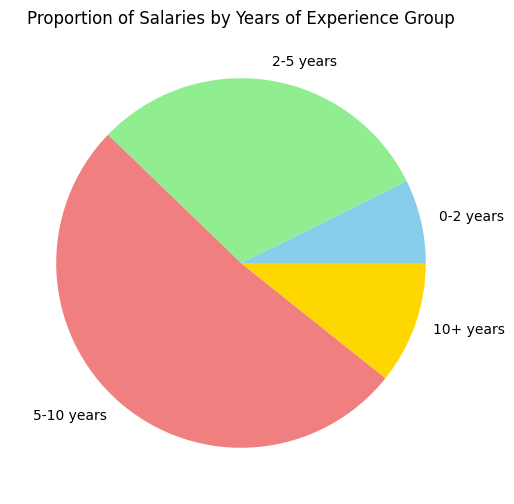

In [18]:
#Pie Chart
bins = [0, 2, 5, 10, 15]  # Define the bins
labels = ['0-2 years', '2-5 years', '5-10 years', '10+ years']  # Labels for the bins
df['ExperienceGroup'] = pd.cut(df['YearsExperience'], bins=bins, labels=labels)

grouped = df.groupby('ExperienceGroup')['Salary'].sum()
plt.figure(figsize=(8, 6))
plt.pie(grouped, labels=labels,colors=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Proportion of Salaries by Years of Experience Group')
plt.show()

Linear Regression On Salary Data

In [ ]:
#Importing Libraries for Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# Prepare the data
X = df[['YearsExperience']]  # Independent variable
y = df['Salary']             # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 37784662.46621314
R-squared (R²): 0.9414466227178214


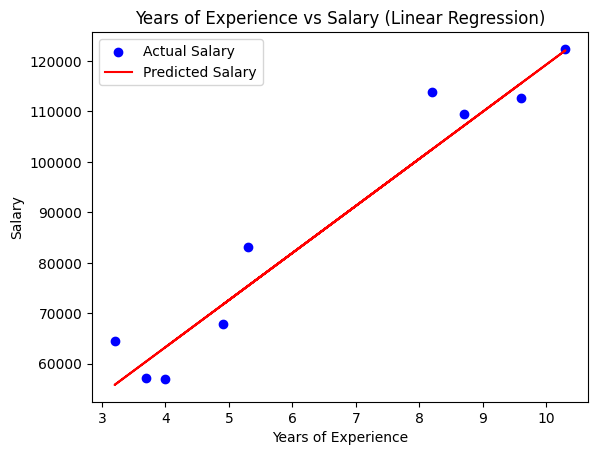

In [26]:
# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.plot(X_test, y_pred, color='red', label='Predicted Salary')
plt.title('Years of Experience vs Salary (Linear Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [27]:
# Interpret the model coefficients
print(f"Intercept (b0): {model.intercept_}")
print(f"Slope (b1): {model.coef_[0]}")

Intercept (b0): 25918.438334893202
Slope (b1): 9339.081723815198


In [28]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import joblib

# Save the trained model to a file
model_filename = 'linear_regression_model.pkl'
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")

Model saved to linear_regression_model.pkl


In [30]:
# Load the saved model from the file
loaded_model = joblib.load(model_filename)

# Use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model
mse_loaded = mean_squared_error(y_test, y_pred_loaded)
r2_loaded = r2_score(y_test, y_pred_loaded)
print(f'Mean Squared Error (Loaded Model): {mse_loaded}')
print(f'R-squared (Loaded Model): {r2_loaded}')

Mean Squared Error (Loaded Model): 37784662.46621314
R-squared (Loaded Model): 0.9414466227178214
